# Dataset for classifying iris flowers

150 examples of iris blooms from three different species make up the Iris flower categorization dataset.

    Setosa, Iris
    Versicolor iris
    Virginia Iris

Three classes of 50 instances each are present in the data set, each class referring to a different variety of iris plant.Two classes cannot be linearly separated from one another, although one class can be linearly separated from the other two.
Information about the attribute:

    In centimeters, the sepal length
    Petal length and sepal breadth in centimeters
    petals' width in centimeters

The dataset is frequently utilized in machine learning as a standard for supervised classification tasks designed to correctly categorize Iris flowers based on their measurements.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

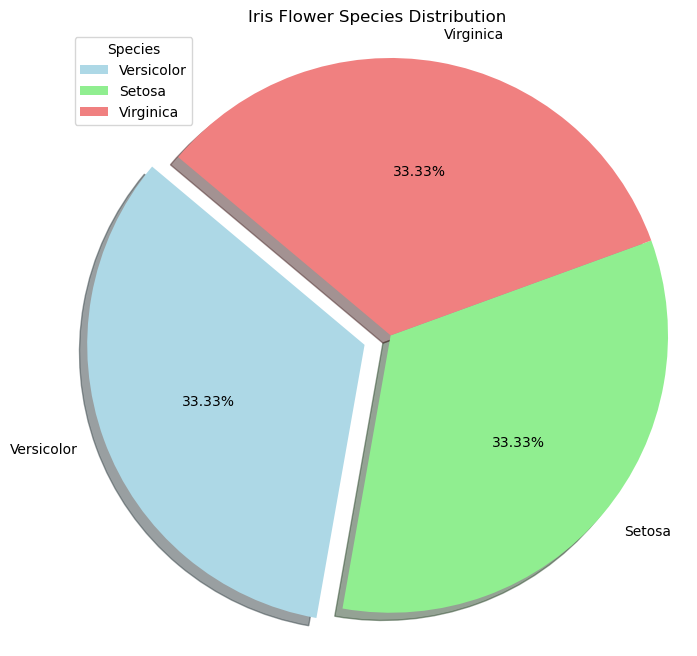

In [6]:
species = ['Versicolor', 'Setosa', 'Virginica']
counts = [50, 50, 50]
colors = ['lightblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=species, colors=colors, explode=explode, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Iris Flower Species Distribution')

plt.legend(species, title="Species", loc="best")
plt.axis('equal')
plt.show()

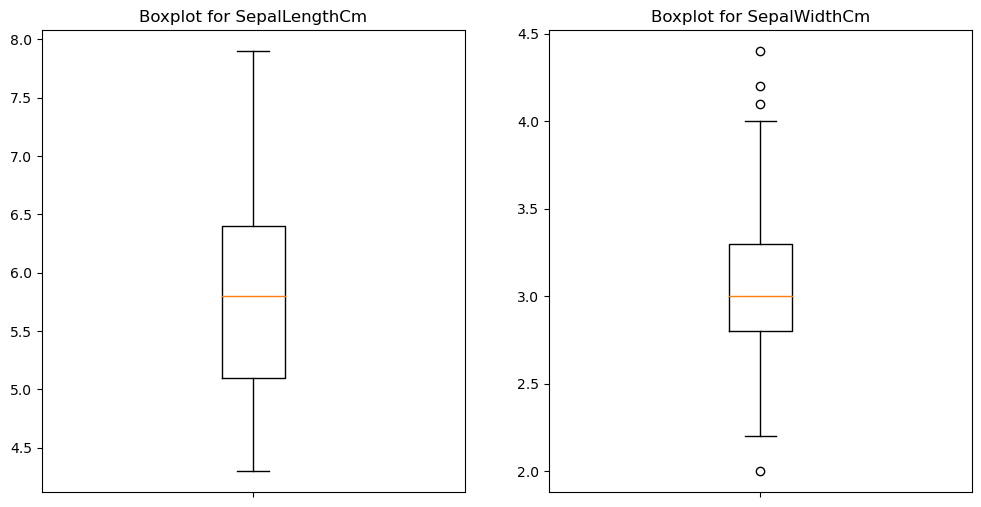

In [7]:
# checking for outliers
columns_to_check = ['SepalLengthCm', 'SepalWidthCm']

fig, axs = plt.subplots(1, len(columns_to_check), figsize=(12, 6))

for i, col in enumerate(columns_to_check):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Boxplot for {col}')
    axs[i].set_xticklabels([''])

plt.show()


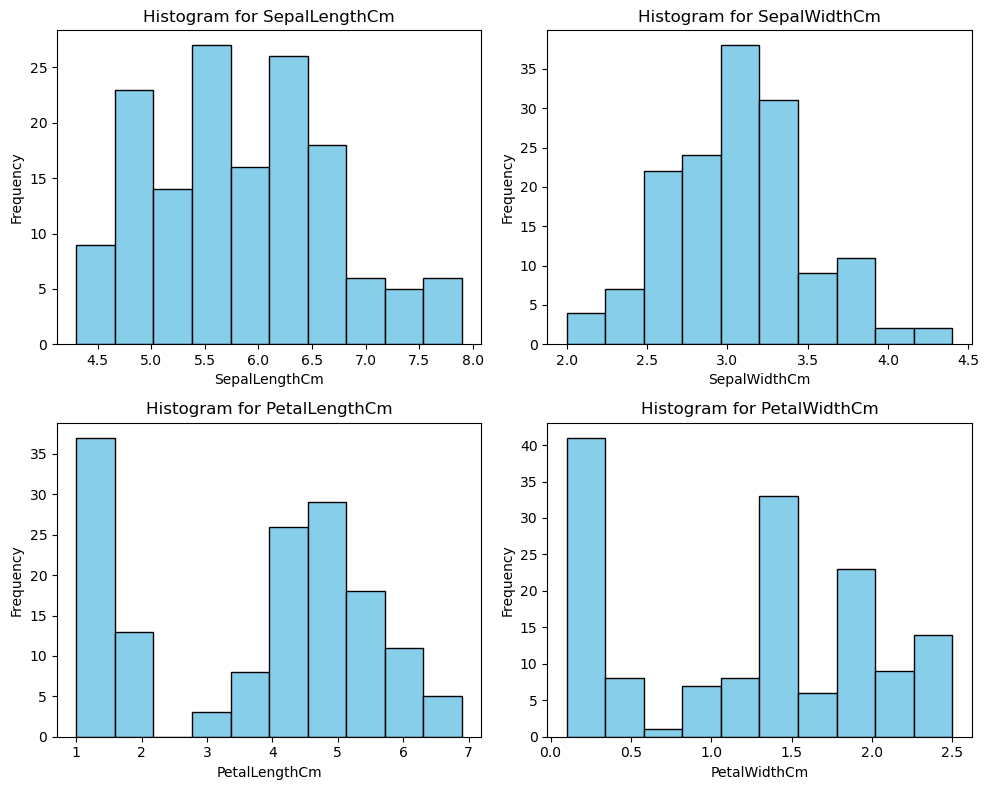

In [8]:
num_bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()

columns_to_plot = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, col in enumerate(columns_to_plot):
    axs[i].hist(df[col], bins=num_bins, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

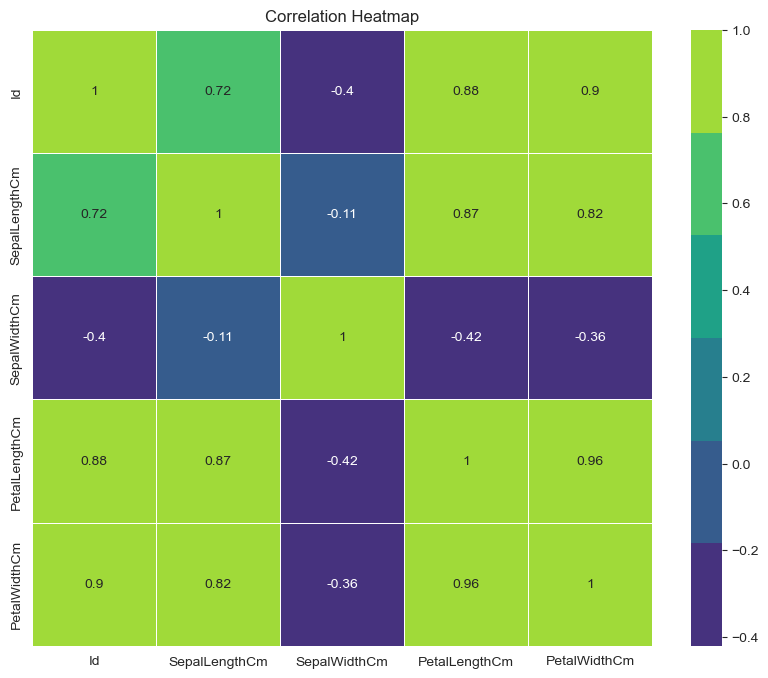

In [9]:
custom_palette = sns.color_palette("viridis")
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

## Encoding the data

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [13]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species_encoded']

## Spliting the data

In [14]:
from sklearn.model_selection import train_test_split

# Spliting  the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

print('Training set shape: X_train={}, y_train={}'.format(X_train.shape, y_train.shape))
print('Testing set shape: X_test={}, y_test={}'.format(X_test.shape, y_test.shape))

Training set shape: X_train=(105, 4), y_train=(105,)
Testing set shape: X_test=(45, 4), y_test=(45,)


## Testing Different classification models

Learning rate set to 0.070535
0:	learn: 1.0129502	total: 171ms	remaining: 2m 50s
1:	learn: 0.9497169	total: 173ms	remaining: 1m 26s
2:	learn: 0.8935700	total: 174ms	remaining: 57.9s
3:	learn: 0.8435332	total: 176ms	remaining: 43.8s
4:	learn: 0.7901775	total: 177ms	remaining: 35.3s
5:	learn: 0.7433121	total: 178ms	remaining: 29.5s
6:	learn: 0.7080758	total: 179ms	remaining: 25.3s
7:	learn: 0.6715364	total: 179ms	remaining: 22.2s
8:	learn: 0.6339117	total: 180ms	remaining: 19.8s
9:	learn: 0.6034973	total: 181ms	remaining: 17.9s
10:	learn: 0.5717722	total: 181ms	remaining: 16.3s
11:	learn: 0.5452444	total: 182ms	remaining: 15s
12:	learn: 0.5188194	total: 183ms	remaining: 13.9s
13:	learn: 0.4915234	total: 183ms	remaining: 12.9s
14:	learn: 0.4726894	total: 184ms	remaining: 12.1s
15:	learn: 0.4497635	total: 184ms	remaining: 11.3s
16:	learn: 0.4323913	total: 185ms	remaining: 10.7s
17:	learn: 0.4138441	total: 186ms	remaining: 10.1s
18:	learn: 0.4010288	total: 187ms	remaining: 9.63s
19:	learn: 

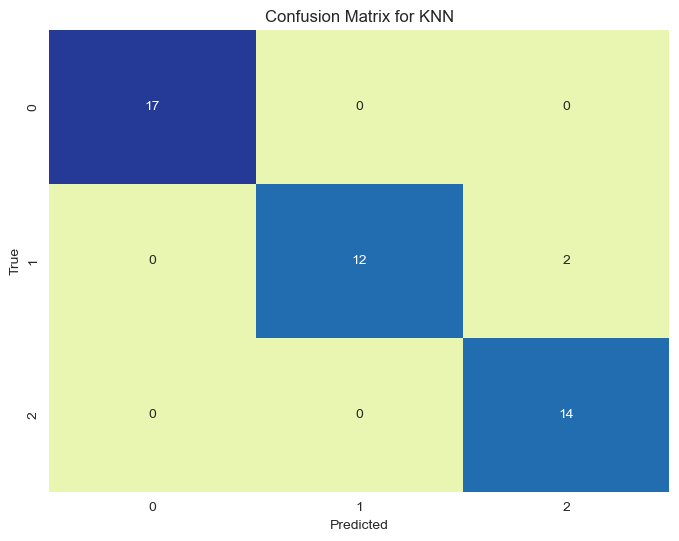

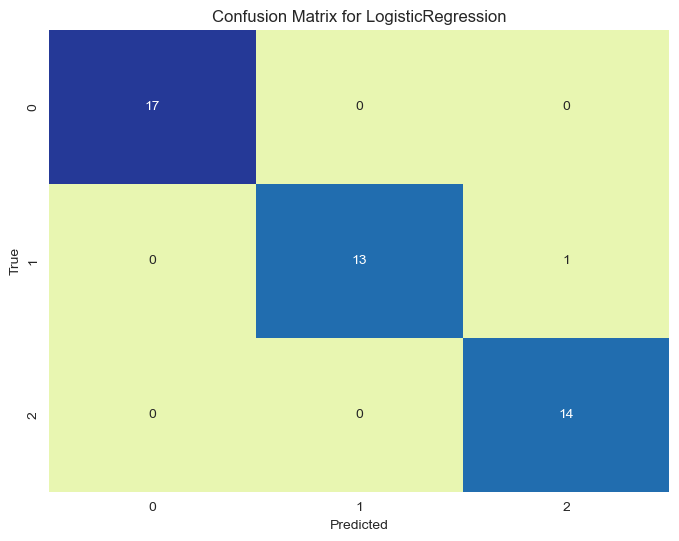

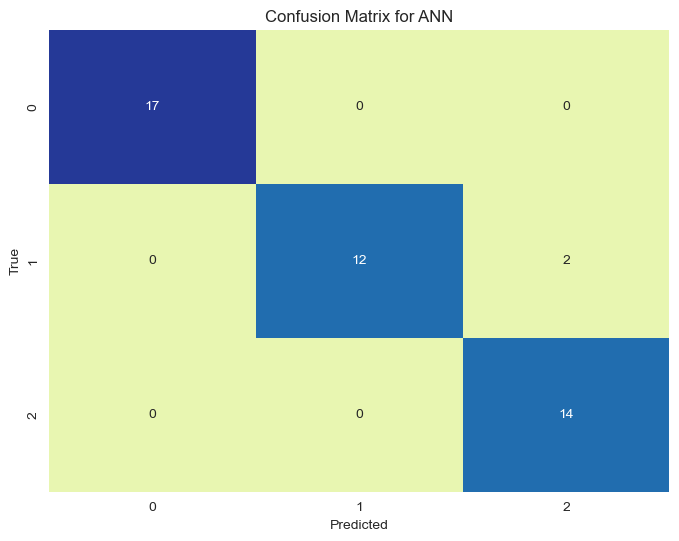

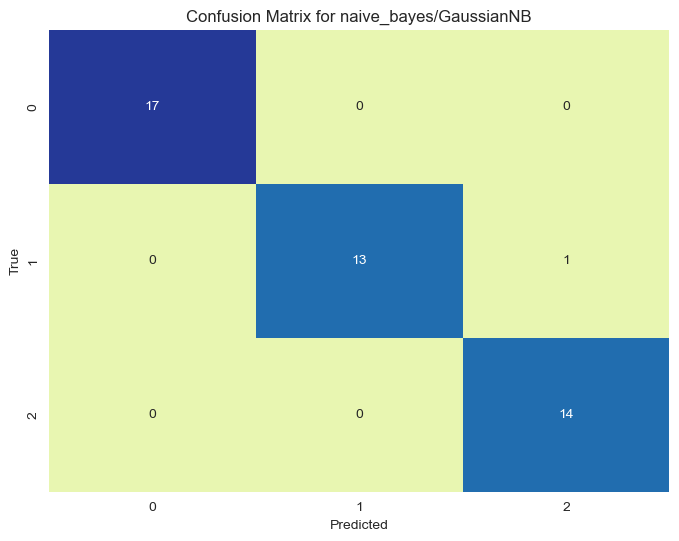

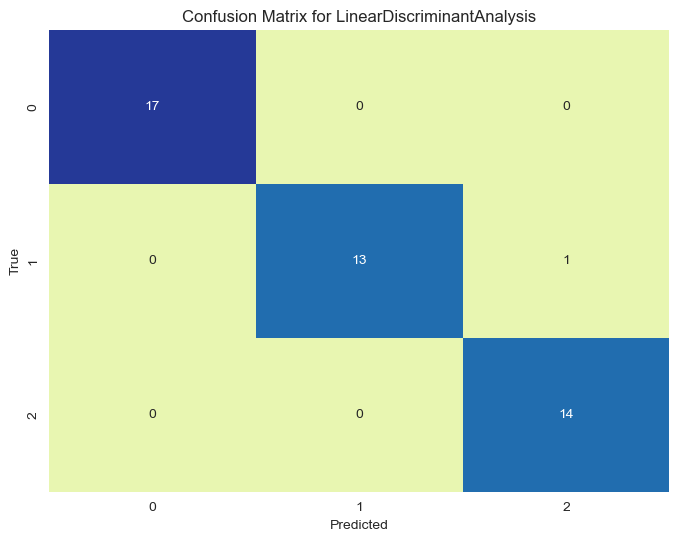

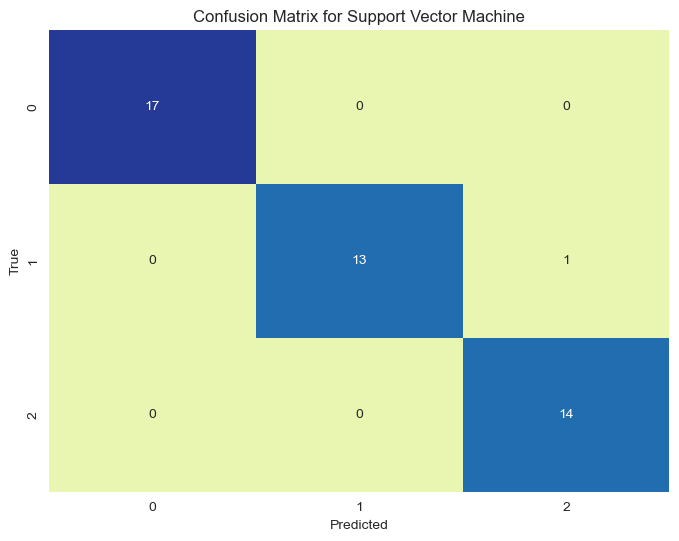

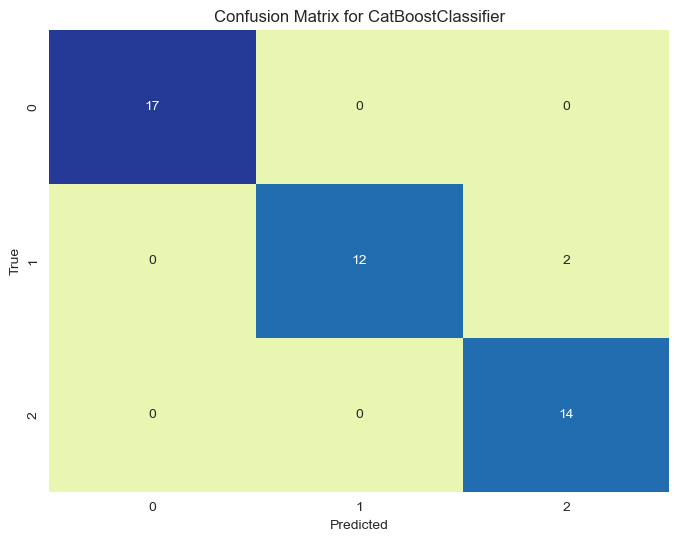

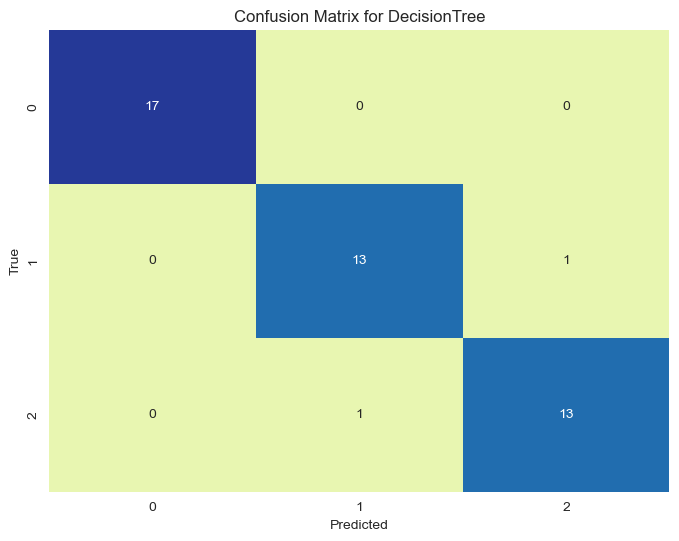

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

def plot_confusion_matrix(model, x_test, y_test, model_name):
    predictions = model.predict(x_test)
    cm = confusion_matrix(y_test, predictions)
    
    # Create a custom color palette (you can choose any palette you like)
    custom_palette = sns.color_palette("YlGnBu")  # Replace "YlGnBu" with your preferred palette
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=custom_palette, cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Function to calculate classification metrics for multiple models
def calculate_classification_metrics(models, x_train, y_train, x_test, y_test):
    metrics = {}
    
    for model_name, model in models.items():
        model.fit(x_train, y_train)  # Fit the model on the training data
        predictions = model.predict(x_test)
        
        classification_metrics = classification_report(y_test, predictions)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f_measure = f1_score(y_test, predictions, average='weighted')
        
        metrics[model_name] = {
            'Classification Metrics': classification_metrics,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F-measure': f_measure
        }
    
    return metrics

# Dictionary of model names and models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'LogisticRegression': LogisticRegression(),
    'ANN': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
    'naive_bayes/GaussianNB': GaussianNB(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'Support Vector Machine': SVC(),
    'CatBoostClassifier': CatBoostClassifier(),
    'DecisionTree': DecisionTreeClassifier()  # Add Decision Tree classifier
}

# Calculate classification metrics
classification_metrics = calculate_classification_metrics(models, X_train, y_train, X_test, y_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Classification Metrics', 'Accuracy', 'Precision', 'Recall', 'F-measure'])

# Populate the DataFrame with the results
for model_name, metrics in classification_metrics.items():
    results_df = results_df.append({
        'Model': model_name,
        'Classification Metrics': metrics['Classification Metrics'],
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F-measure': metrics['F-measure']
    }, ignore_index=True)

# Print the results DataFrame
print(results_df)

# Plot confusion matrices for each model
for model_name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, model_name)

In [16]:
results_df

,Model,Classification Metrics,Accuracy,Precision,Recall,F-measure
0,KNN,precision recall f1-score ...,0.955556,0.961111,0.955556,0.955328
1,LogisticRegression,precision recall f1-score ...,0.977778,0.979259,0.977778,0.977749
2,ANN,precision recall f1-score ...,0.955556,0.961111,0.955556,0.955328
3,naive_bayes/GaussianNB,precision recall f1-score ...,0.977778,0.979259,0.977778,0.977749
4,LinearDiscriminantAnalysis,precision recall f1-score ...,0.977778,0.979259,0.977778,0.977749
5,Support Vector Machine,precision recall f1-score ...,0.977778,0.979259,0.977778,0.977749
6,CatBoostClassifier,precision recall f1-score ...,0.955556,0.961111,0.955556,0.955328
7,DecisionTree,precision recall f1-score ...,0.955556,0.955556,0.955556,0.955556


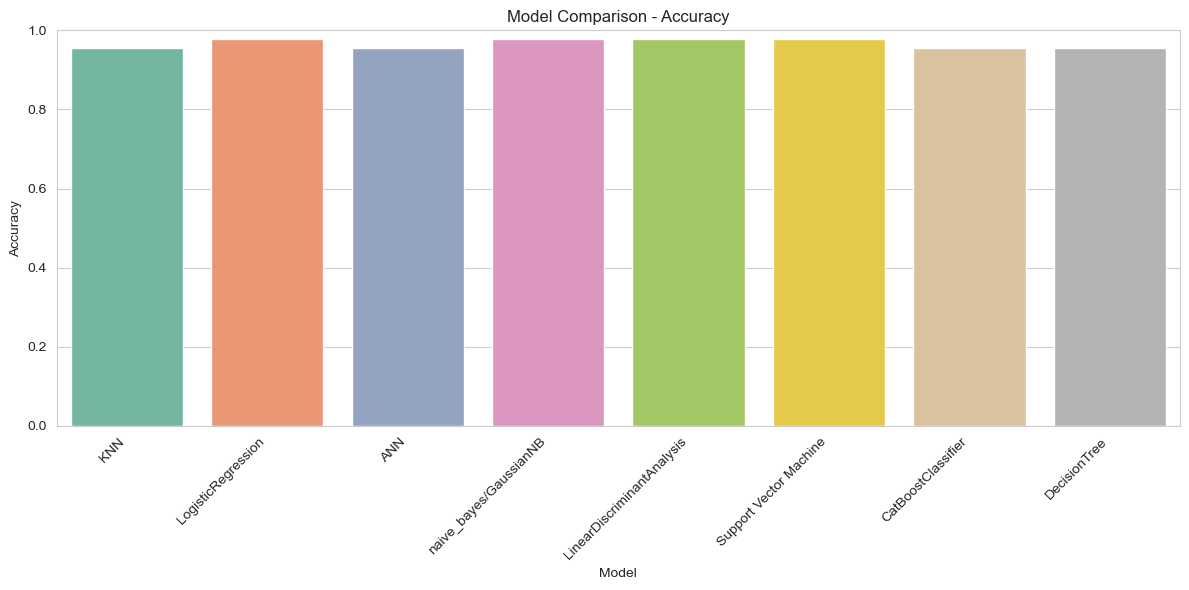

In [17]:
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette=custom_palette)
plt.title('Model Comparison - Accuracy')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

As we can see from the table above, naive_bayes/GaussianNB, LinearDiscriminantAnalysis, Support Vector Machine, and DecisionTree provide greater accuracy than other models.Most likely, we can utilise these models to train our dataset.